### Introduction to Machine Learning with Python
## Chapter 4. 데이터 표현과 특성 공학
---
# 범주형 변수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 지하철 데이터 불러오기

In [2]:
data = pd.read_csv('CARD_SUBWAY_MONTH_201901.csv')

In [23]:
data.shape

(18334, 7)

In [3]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


### 노선명 코드화

In [10]:
data.노선명.unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [3]:
labels, uniques = data.노선명.factorize(sort=True)
display(labels, uniques)

array([15, 15, 15, ...,  0,  0,  0], dtype=int64)

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object')

In [26]:
data2 = data.copy()
data2['노선코드'] = labels
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,노선코드
0,20190101,경춘선,1323,가평,1520,1436,20190104,15
1,20190101,경춘선,1322,상천,275,114,20190104,15
2,20190101,경춘선,1321,청평,1509,1083,20190104,15
3,20190101,경춘선,1320,대성리,357,271,20190104,15
4,20190101,경춘선,1319,마석,1772,1963,20190104,15


In [27]:
uniques[data2.노선코드]

Index(['경춘선', '경춘선', '경춘선', '경춘선', '경춘선', '경춘선', '경춘선', '경춘선', '경춘선', '경춘선',
       ...
       '2호선', '1호선', '1호선', '1호선', '1호선', '1호선', '1호선', '1호선', '1호선', '1호선'],
      dtype='object', length=18334)

In [10]:
pd.Series(uniques)

0          1호선
1          2호선
2          3호선
3          4호선
4          5호선
5          6호선
6          7호선
7          8호선
8          9호선
9     9호선2~3단계
10         경강선
11         경부선
12         경원선
13         경의선
14         경인선
15         경춘선
16    공항철도 1호선
17         과천선
18         분당선
19         수인선
20         안산선
21       우이신설선
22         일산선
23         장항선
24         중앙선
dtype: object

### 노선명 원핫인코딩 (one-hot-encoding)

In [13]:
data.노선명

0        경춘선
1        경춘선
2        경춘선
3        경춘선
4        경춘선
5        경춘선
6        경춘선
7        경춘선
8        경춘선
9        경춘선
10       경춘선
11       경춘선
12       경인선
13       경인선
14       경인선
15       경인선
16       경의선
17       경의선
18       경의선
19       경의선
20       경의선
21       경의선
22       경의선
23       경의선
24       경의선
25       경의선
26       경의선
27       경의선
28       경의선
29       경의선
        ... 
18304    2호선
18305    2호선
18306    2호선
18307    2호선
18308    2호선
18309    2호선
18310    2호선
18311    2호선
18312    2호선
18313    2호선
18314    2호선
18315    2호선
18316    2호선
18317    2호선
18318    2호선
18319    2호선
18320    2호선
18321    2호선
18322    2호선
18323    2호선
18324    2호선
18325    1호선
18326    1호선
18327    1호선
18328    1호선
18329    1호선
18330    1호선
18331    1호선
18332    1호선
18333    1호선
Name: 노선명, Length: 18334, dtype: object

In [11]:
onehot = pd.get_dummies(data.노선명)
onehot.head()

,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
onehot.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
onehot.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선',
       '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object')

In [43]:
# pd.concat([data, onehot], axis=1).head()
data.join(onehot).head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,1호선,2호선,3호선,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
0,20190101,경춘선,1323,가평,1520,1436,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,20190101,경춘선,1322,상천,275,114,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20190101,경춘선,1321,청평,1509,1083,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,20190101,경춘선,1320,대성리,357,271,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,20190101,경춘선,1319,마석,1772,1963,20190104,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
data2 = pd.get_dummies(data, columns=['노선명'])
data2.head()

,사용일자,역ID,역명,승차총승객수,하차총승객수,등록일자,노선명_1호선,노선명_2호선,노선명_3호선,노선명_4호선,...,노선명_경춘선,노선명_공항철도 1호선,노선명_과천선,노선명_분당선,노선명_수인선,노선명_안산선,노선명_우이신설선,노선명_일산선,노선명_장항선,노선명_중앙선
0,20190101,1323,가평,1520,1436,20190104,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,20190101,1322,상천,275,114,20190104,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20190101,1321,청평,1509,1083,20190104,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,20190101,1320,대성리,357,271,20190104,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,20190101,1319,마석,1772,1963,20190104,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
data2.columns

Index(['사용일자', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '노선명_1호선', '노선명_2호선',
       '노선명_3호선', '노선명_4호선', '노선명_5호선', '노선명_6호선', '노선명_7호선', '노선명_8호선',
       '노선명_9호선', '노선명_9호선2~3단계', '노선명_경강선', '노선명_경부선', '노선명_경원선', '노선명_경의선',
       '노선명_경인선', '노선명_경춘선', '노선명_공항철도 1호선', '노선명_과천선', '노선명_분당선', '노선명_수인선',
       '노선명_안산선', '노선명_우이신설선', '노선명_일산선', '노선명_장항선', '노선명_중앙선'],
      dtype='object')

### 역코드표 만들기

In [44]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [20]:
역코드표 = data[['역ID','역명','노선명']].drop_duplicates().sort_values('역ID').reset_index(drop=True)
역코드표

,역ID,역명,노선명
0,150,서울역,1호선
1,151,시청,1호선
2,152,종각,1호선
3,153,종로3가,1호선
4,154,종로5가,1호선
5,155,동대문,1호선
6,156,신설동,1호선
7,157,제기동,1호선
8,158,청량리(서울시립대입구),1호선
9,159,동묘앞,1호선


In [55]:
data2 = data[['사용일자','역ID','승차총승객수','하차총승객수']]
data2.head()

,사용일자,역ID,승차총승객수,하차총승객수
0,20190101,1323,1520,1436
1,20190101,1322,275,114
2,20190101,1321,1509,1083
3,20190101,1320,357,271
4,20190101,1319,1772,1963


In [59]:
data2.merge(역코드표, on='역ID').head()

,사용일자,역ID,승차총승객수,하차총승객수,역명,노선명
0,20190101,1323,1520,1436,가평,경춘선
1,20190102,1323,1801,1885,가평,경춘선
2,20190103,1323,1717,1869,가평,경춘선
3,20190104,1323,1752,1909,가평,경춘선
4,20190105,1323,1759,1928,가평,경춘선


### 사용일자-노선명 피벗테이블 만들기

In [61]:
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [63]:
pv = data.pivot_table(values='승차총승객수', index='사용일자', columns='노선명', aggfunc='mean')
pv.head()

노선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
사용일자,,,,,,,,,,,,,,,,,,,,,
20190101,15295.5,13624.08,7108.411765,10613.538462,4885.941176,4410.684211,5844.882353,5008.235294,4495.32,2410.000000,...,1068.368421,5552.500000,4899.875,4401.411765,1785.076923,5196.538462,1726.000000,5170.4,1729.666667,2197.190476
20190102,28386.1,32342.00,17164.264706,22394.730769,12758.666667,9424.236842,14909.098039,11785.882353,11519.44,5919.692308,...,1874.631579,8469.214286,14023.625,11034.285714,3427.384615,9720.461538,3271.153846,11702.2,2089.666667,4435.523810
20190103,29592.5,33702.84,17881.382353,23318.000000,13137.647059,10095.918919,15274.019608,12094.882353,11912.56,6211.769231,...,1916.000000,8479.285714,14200.000,11437.800000,3548.846154,9898.692308,3386.000000,12048.9,2138.500000,4643.571429
20190104,31664.8,35276.84,19443.151515,24231.153846,13534.058824,10527.513514,15751.156863,12827.000000,12538.68,6425.769231,...,2013.105263,8948.142857,15780.625,12376.285714,3721.538462,10452.307692,3493.153846,12459.0,2648.833333,4794.619048
20190105,25247.3,25251.02,13766.147059,18629.576923,8932.529412,7642.648649,10723.843137,8723.294118,8180.32,5057.384615,...,1594.421053,6928.214286,12030.250,8690.882353,2774.307692,8354.230769,2727.692308,9272.9,2255.666667,4053.476190


### 날자 코드화

In [64]:
pd.to_datetime(data.사용일자, format='%Y%m%d')

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
5       2019-01-01
6       2019-01-01
7       2019-01-01
8       2019-01-01
9       2019-01-01
10      2019-01-01
11      2019-01-01
12      2019-01-01
13      2019-01-01
14      2019-01-01
15      2019-01-01
16      2019-01-01
17      2019-01-01
18      2019-01-01
19      2019-01-01
20      2019-01-01
21      2019-01-01
22      2019-01-01
23      2019-01-01
24      2019-01-01
25      2019-01-01
26      2019-01-01
27      2019-01-01
28      2019-01-01
29      2019-01-01
           ...    
18304   2019-01-31
18305   2019-01-31
18306   2019-01-31
18307   2019-01-31
18308   2019-01-31
18309   2019-01-31
18310   2019-01-31
18311   2019-01-31
18312   2019-01-31
18313   2019-01-31
18314   2019-01-31
18315   2019-01-31
18316   2019-01-31
18317   2019-01-31
18318   2019-01-31
18319   2019-01-31
18320   2019-01-31
18321   2019-01-31
18322   2019-01-31
18323   2019-01-31
18324   2019-01-31
18325   2019

In [65]:
data2 = data.copy()
data2['일자'] = pd.to_datetime(data.사용일자, format='%Y%m%d')
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019-01-01
1,20190101,경춘선,1322,상천,275,114,20190104,2019-01-01
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019-01-01
3,20190101,경춘선,1320,대성리,357,271,20190104,2019-01-01
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019-01-01


In [71]:
data2['년'] = data2.일자.dt.year
data2['월'] = data2.일자.dt.month
data2['일'] = data2.일자.dt.day
data2['wday'] = data2.일자.dt.weekday
data2['wname'] = data2.일자.dt.weekday_name

data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자,년,월,일,wday,wname
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019-01-01,2019,1,1,1,Tuesday
1,20190101,경춘선,1322,상천,275,114,20190104,2019-01-01,2019,1,1,1,Tuesday
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019-01-01,2019,1,1,1,Tuesday
3,20190101,경춘선,1320,대성리,357,271,20190104,2019-01-01,2019,1,1,1,Tuesday
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019-01-01,2019,1,1,1,Tuesday


In [73]:
data2['요일'] = data2.일자.dt.weekday.map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자,년,월,일,wday,wname,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019-01-01,2019,1,1,1,Tuesday,화
1,20190101,경춘선,1322,상천,275,114,20190104,2019-01-01,2019,1,1,1,Tuesday,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019-01-01,2019,1,1,1,Tuesday,화
3,20190101,경춘선,1320,대성리,357,271,20190104,2019-01-01,2019,1,1,1,Tuesday,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019-01-01,2019,1,1,1,Tuesday,화


In [77]:
pv = data2.pivot_table('승차총승객수', '노선명', '요일', 'mean')[['월','화','수','목','금','토','일']]
pv.head()

요일,월,화,수,목,금,토,일
노선명,,,,,,,
1호선,29270.025000,27067.020000,29584.94000,30320.360000,32239.500000,26339.675000,18220.875000
2호선,32991.040000,29684.968000,33618.90000,34068.988000,35683.450000,25888.060000,18220.505000
3호선,17597.485294,15775.441176,17949.16568,18389.190476,19358.948148,14398.610294,9894.051852
4호선,22589.942308,20666.061538,23077.20000,23368.607692,24370.278846,19093.692308,13751.307692
5호선,12963.715686,11550.909804,13178.32549,13294.627451,13613.107843,9124.470588,6406.632353


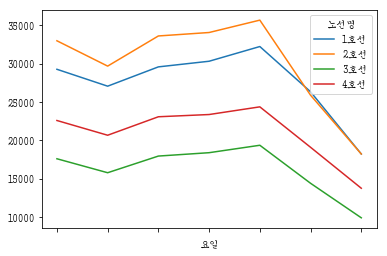

In [113]:
import matplotlib
from matplotlib import font_manager, rc
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

pv[:4].T.plot()

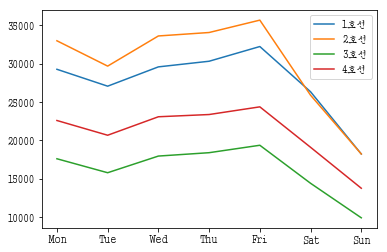

In [114]:
plt.plot(pv[:4].values.T)
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(['1호선','2호선','3호선','4호선'])
# plt.legend(['line-1','line-2','line-3','line-4'])

### 숫자 원핫인코딩

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()
X = np.c_[iris.data, iris.target]
X.shape

(150, 5)

In [92]:
pd.get_dummies(iris.target)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [91]:
pd.get_dummies(pd.DataFrame(X), columns=[4])

,0,1,2,3,4_0.0,4_1.0,4_2.0
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


In [93]:
np.eye(3)[iris.target]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [94]:
np.c_[iris.data, np.eye(3)[iris.target]]

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

### 멱함수 회귀 (테스트)

In [116]:
data2.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,일자,년,월,일,wday,wname,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,2019-01-01,2019,1,1,1,Tuesday,화
1,20190101,경춘선,1322,상천,275,114,20190104,2019-01-01,2019,1,1,1,Tuesday,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,2019-01-01,2019,1,1,1,Tuesday,화
3,20190101,경춘선,1320,대성리,357,271,20190104,2019-01-01,2019,1,1,1,Tuesday,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,2019-01-01,2019,1,1,1,Tuesday,화


In [134]:
ser = data2.groupby('역명').승차총승객수.sum().sort_values(ascending=False)
ser.head()

역명
강남          3339904
잠실(송파구청)    3110899
고속터미널       2911933
홍대입구        2878319
서울역         2838450
Name: 승차총승객수, dtype: int64

In [135]:
ser.shape

(509,)

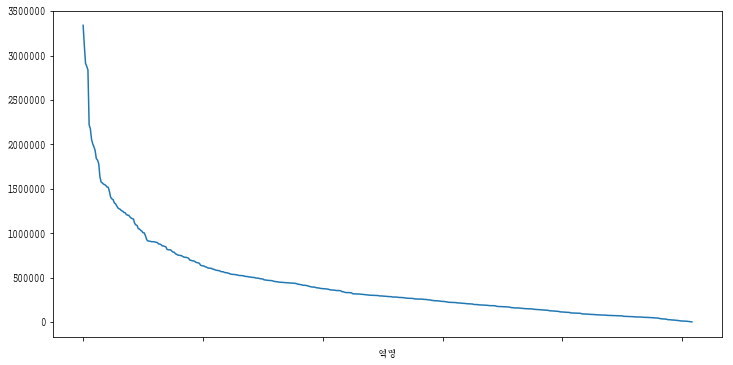

In [136]:
ser.plot(figsize=[12,6])

In [142]:
l = ser.tolist()

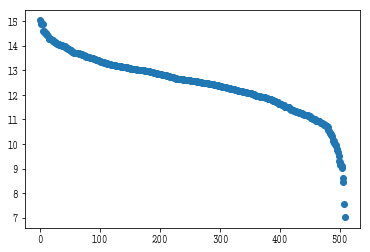

In [182]:
plt.scatter(range(len(ser)), np.log(l))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


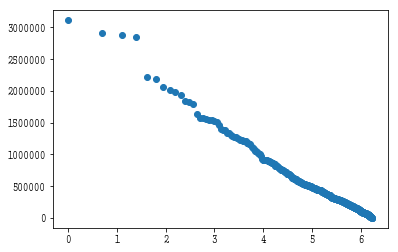

In [143]:
plt.scatter(np.log(range(len(ser))), l)

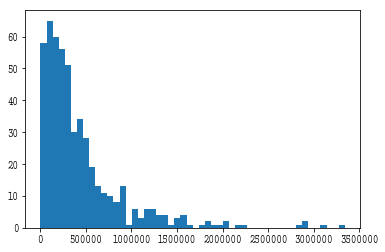

In [154]:
plt.hist(l, bins=50)
pass

In [187]:
cnt = np.histogram(l, bins=20)[0]
cnt

array([153, 137,  78,  46,  25,  18,  11,  14,   5,   8,   2,   3,   2,
         2,   0,   0,   1,   2,   1,   1], dtype=int64)

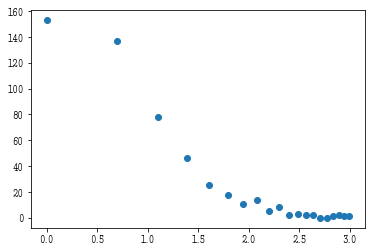

In [188]:
plt.scatter(np.log(range(1,len(cnt)+1)),cnt)

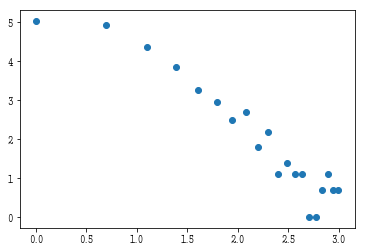

In [189]:
plt.scatter(np.log(range(1,len(cnt)+1)),np.log(cnt+1))

In [190]:
X = np.log(range(1,len(cnt)+1)).reshape(-1,1)
y = np.log(cnt+1)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
model.coef_, model.intercept_

(array([-1.84123397]), 5.968911910159655)

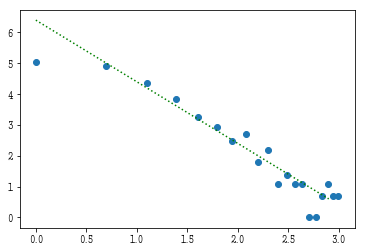

In [205]:
plt.scatter(np.log(range(1,len(cnt)+1)),np.log(cnt+1))
xs = np.arange(0,3,0.1)
plt.plot(xs, -2*xs + 6.4, 'g:')